# 2020

In [61]:
import pandas as pd

# read submissions data
data = pd.read_csv("../2020/data/scoreboardDataApril8.csv")

# drop unneeded columns
data = data.drop(['twitter', 'privacyPreference', 'alias', 'showAnswers', 'score', 'percentage', 'name'], axis=1)

# show example row
display(data[data['participant'] == 'Oliver Gladfelter'])

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,participant
2,Michael Bennet,Cory Booker,Marianne Williamson,Deval Patrick,John Delaney,Amy Klobuchar,Tom Steyer,Andrew Yang,Pete Buttigieg,Michael Bloomberg,Bernie Sanders,Tulsi Gabbard,Joe Biden,Elizabeth Warren,Oliver Gladfelter


In [54]:
# reformat survey data such that each column is candidate name, and the row values are predicted drop out positions
reformattedData = {'participant':[]}

for row in data.index:
    for column in data.columns:
        if column == 'participant':
            reformattedData['participant'].append(data[column][row])
        elif data[column][row] not in reformattedData:
            reformattedData[data[column][row]] = [int(column)]
        elif data[column][row] in reformattedData:
            reformattedData[data[column][row]].append(int(column))
            
reformattedData = pd.DataFrame(reformattedData)

# show example row
display(reformattedData[reformattedData['participant'] == 'Oliver Gladfelter'])

,participant,Marianne Williamson,Michael Bennet,Cory Booker,Deval Patrick,Tom Steyer,John Delaney,Andrew Yang,Amy Klobuchar,Michael Bloomberg,Elizabeth Warren,Tulsi Gabbard,Pete Buttigieg,Bernie Sanders,Joe Biden
2,Oliver Gladfelter,3,1,2,4,7,5,8,6,10,14,12,9,11,13


In [90]:
# compile a dataframe in which each row is a candidate, and each column value is number of predictions
# that the candidate will drop out in that position
candidatePositionCounts = []
rankSpots = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']

for rank in rankSpots:
    candidatePositionCounts.append(data[rank].value_counts().to_dict())
    
heatmap = pd.DataFrame(candidatePositionCounts).fillna(0).transpose()

display(heatmap)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Michael Bennet,25.0,26.0,10.0,6.0,5.0,8.0,3.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0
John Delaney,13.0,15.0,15.0,11.0,10.0,12.0,1.0,2.0,4.0,2.0,3.0,0.0,0.0,0.0
Marianne Williamson,12.0,5.0,17.0,19.0,13.0,5.0,5.0,4.0,5.0,1.0,1.0,1.0,0.0,0.0
Deval Patrick,12.0,14.0,14.0,17.0,10.0,7.0,7.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0
Cory Booker,10.0,10.0,12.0,5.0,15.0,3.0,9.0,7.0,10.0,6.0,0.0,1.0,0.0,0.0
Tulsi Gabbard,7.0,6.0,5.0,4.0,9.0,17.0,12.0,6.0,9.0,6.0,4.0,3.0,0.0,0.0
Amy Klobuchar,4.0,4.0,6.0,9.0,8.0,4.0,15.0,16.0,15.0,6.0,1.0,0.0,0.0,0.0
Tom Steyer,4.0,4.0,6.0,13.0,6.0,13.0,15.0,7.0,10.0,7.0,2.0,1.0,0.0,0.0
Andrew Yang,1.0,0.0,1.0,2.0,5.0,12.0,9.0,16.0,17.0,14.0,7.0,1.0,2.0,1.0
Michael Bloomberg,0.0,2.0,1.0,1.0,4.0,6.0,9.0,15.0,7.0,21.0,12.0,3.0,4.0,3.0


[[Text(0.5, 0, '1st'),
  Text(1.5, 0, '2'),
  Text(2.5, 0, '3'),
  Text(3.5, 0, '4'),
  Text(4.5, 0, '5'),
  Text(5.5, 0, '6'),
  Text(6.5, 0, '7'),
  Text(7.5, 0, '8'),
  Text(8.5, 0, '9'),
  Text(9.5, 0, '10'),
  Text(10.5, 0, '11'),
  Text(11.5, 0, '12'),
  Text(12.5, 0, '13'),
  Text(13.5, 0, 'Win')]]

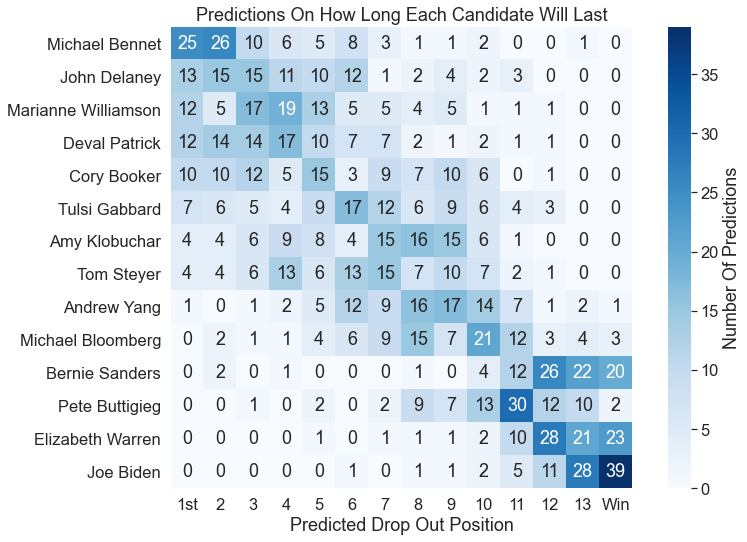

In [99]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})

sns.set(font_scale=1.5)
ax = sns.heatmap(heatmap, cmap="Blues", square = True, robust = False, cbar_kws={'label': 'Number Of Predictions'}, annot=True)

fig = ax.get_figure()
fig.tight_layout(pad=2.5)

ax.set(title="Predictions On How Long Each Candidate Will Last")
ax.set(xlabel='Predicted Drop Out Position')
ax.set(xticklabels=["1st",2,3,4,5,6,7,8,9,10,11,12,13,"Win"])

# 2024

In [18]:
import pandas as pd

# get all predictions data
data = pd.read_csv("../2024/leaderboard/data/submissions2024.csv")[['prediction']]

# for each candidate, find average drop out position
candidateScores = {}
for i in data.index:
    prediction = data['prediction'][i].split(",")[:-1]
    for i, candidate in enumerate(prediction):
        if candidate in candidateScores:
            candidateScores[candidate] += i
        else:
            candidateScores[candidate] = i

averagePredictions = [{'candidate': key, 'value': candidateScores[key] / len(data)} for key in candidateScores.keys()]
averagePredictions.sort(key=lambda x: x['value'])
averagePredictions = pd.DataFrame(averagePredictions)
display(averagePredictions.head(3))

# split up prediction column into multiple columns, drop everything else
data[['1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'x']] = data['prediction'].str.split(',',expand=True)
data = data.drop(['prediction', 'x'], axis=1)

display(data.head(3))

,candidate,value
0,hurd,2.063291
1,elder,2.240506
2,suarez,2.721519


,1,2,3,4,5,6,7,8,9,10,11,12
0,ramaswamy,hurd,hutchinson,elder,pence,christie,burgum,scott,haley,suarez,trump,desantis
1,elder,suarez,hurd,burgum,hutchinson,scott,pence,christie,haley,ramaswamy,desantis,trump
2,burgum,elder,suarez,hutchinson,hurd,haley,ramaswamy,pence,scott,desantis,christie,trump


In [36]:
# compile a dataframe in which each row is a candidate, and each column value is number of predictions
# that the candidate will drop out in that position
candidatePositionCounts = []

for c in data.columns:
    candidatePositionCounts.append(data[c].value_counts().to_dict())
    
heatmap = pd.DataFrame(candidatePositionCounts).fillna(0).transpose()
heatmap.columns = pd.RangeIndex(start=1, stop=13, step=1)
heatmap.index.name = 'candidate'
heatmap = heatmap.reset_index()

# sort by average prediction order
heatmap = heatmap.merge(averagePredictions).sort_values('value', ascending = True)
heatmap = heatmap.drop(['value'], axis=1)
heatmap = heatmap.set_index('candidate')

# save for frontend
heatmap.to_csv("../2024/leaderboard/data/heatmapData.csv", index = True)

display(heatmap)

,1,2,3,4,5,6,7,8,9,10,11,12
candidate,,,,,,,,,,,,
hurd,17.0,15.0,19.0,12.0,10.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0
elder,17.0,19.0,12.0,15.0,4.0,6.0,2.0,2.0,1.0,1.0,0.0,0.0
suarez,19.0,14.0,12.0,8.0,6.0,7.0,7.0,1.0,2.0,1.0,2.0,0.0
burgum,11.0,9.0,11.0,14.0,9.0,10.0,6.0,6.0,2.0,0.0,0.0,1.0
hutchinson,6.0,10.0,11.0,13.0,15.0,15.0,4.0,2.0,3.0,0.0,0.0,0.0
scott,3.0,3.0,3.0,6.0,5.0,8.0,14.0,11.0,16.0,5.0,4.0,1.0
christie,1.0,4.0,4.0,4.0,7.0,7.0,9.0,15.0,11.0,10.0,7.0,0.0
ramaswamy,4.0,3.0,5.0,4.0,4.0,7.0,5.0,8.0,12.0,12.0,13.0,2.0
haley,0.0,1.0,2.0,3.0,9.0,8.0,11.0,18.0,11.0,10.0,5.0,1.0


[[Text(0.5, 0, '1st'),
  Text(1.5, 0, '2'),
  Text(2.5, 0, '3'),
  Text(3.5, 0, '4'),
  Text(4.5, 0, '5'),
  Text(5.5, 0, '6'),
  Text(6.5, 0, '7'),
  Text(7.5, 0, '8'),
  Text(8.5, 0, '9'),
  Text(9.5, 0, '10'),
  Text(10.5, 0, '11'),
  Text(11.5, 0, 'Win')]]

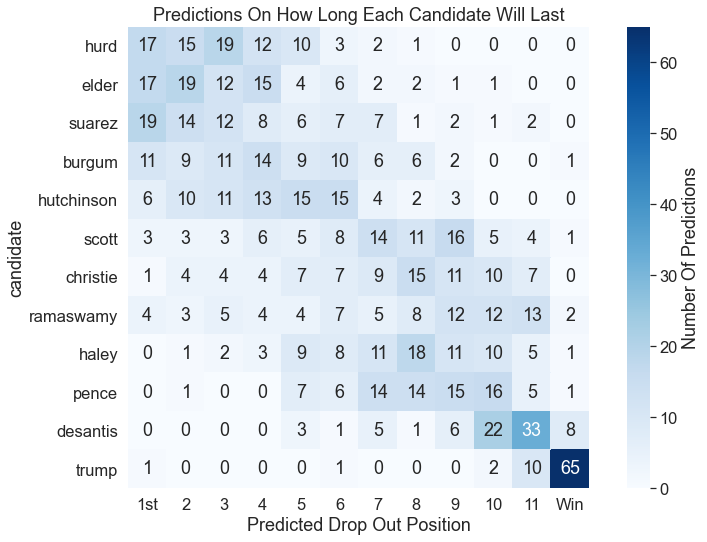

In [32]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})

sns.set(font_scale=1.5)
ax = sns.heatmap(heatmap, cmap="Blues", square = True, robust = False, cbar_kws={'label': 'Number Of Predictions'}, annot=True)

fig = ax.get_figure()
fig.tight_layout(pad=2.5)

ax.set(title="Predictions On How Long Each Candidate Will Last")
ax.set(xlabel='Predicted Drop Out Position')
ax.set(xticklabels=["1st",2,3,4,5,6,7,8,9,10,11,"Win"])